## EKSPLORASI DAN PRAPROSES DATA

### Deskripsi Data

Data yang terdiri dari 28.382 baris dan 22 kolom merupakan data sebuah Bank yang bermaksud untuk 
mempertahankan para kastemernya untuk produk utama perbankan, yaitu saldo tabungan (saving 
accounts). Pihak bank menginginkan untuk mengidentifikasi apakah seorang kastemer kira-kira akan 
melakukan churn terhadap saldo tabungannya. Dalam hal ini, churn dapat dipandang sebagai tindakan yang 
tidak diharapkan sehingga saldo tabungan berkuruang hingga di bawah saldo minimum yamgn ditentukan.

Dalam set data, anda diberikan informasi mengenai kastemer, seperti usia, jenis kelamin, data demografi 
beserta beberapa data transaksi perbankan yang dilakukan oleh kastemer. Setiap baris data 
merepresentasikan seorang kastemer, di mana setiap kolom data berisikan atribut yang terkait dengan 
demografi kastemer dan juga berbagai transaksi yang pernah dilakukan oleh kastemer. Untuk ini, terdapat 
beberapa variabel/atribut dalam set data yang dapat dikelompokkan menjadi tiga kategori sebagai berikut.

#### Demographic informatio/n about customers:

| Column Name | Description |
| --- | --- |
| customer_id | Customer id |
| vintage | Vintage of the customer with the bank in number of days |
| age | Age of customer |
| gender | Gender of customer |
| dependents | Number of dependents |
| occupation | Occupation of the customer |
| city | City of customer |

#### Bank Related Information for customers:

| Column Name | Description |
| --- | --- |
| customer_nw_category | Net worth of customer (3:Low, 2:Medium, 1:High) |
| branch_code | Branch Code for customer account |

#### Transactional Information for customers:

| Column Name | Description |
| --- | --- |
| current_balance | Balance as of today |
| previous_month_end_balance | End of Month Balance of previous month |
| average_monthly_balance_prevQ | Average monthly balances (AMB) in Previous Quarter |
| average_monthly_balance_prevQ2 | Average monthly balances (AMB) in previous to previous quarter |
| current_month_credit | Total Credit Amount current month |
| previous_month_credit | Total Credit Amount previous month |
| current_month_debit | Total Debit Amount current month |
| previous_month_debit | Total Debit Amount previous month |
| current_month_balance | Average Balance of current month |
| previous_month_balance | Average Balance of previous month |
| churn | Average Balance of customer falls below minimum balance in the next quarter (1/0) |


In [1]:
# import modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# set matploblib syling to seaborn
plt.style.use('seaborn') # soon to be deprecated

rcParams['axes.titlepad'] = 15
rcParams['axes.labelpad'] = 15
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

C:\Users\hiday\AppData\Local\Temp\ipykernel_19704\1801827948.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # soon to be deprecated


In [3]:
# set working directory, path, folder for data
dir = os.getcwd()
folder = 'data'
path = os.path.join(dir, folder)

In [4]:
# set filename
filename = 'data_tgp_1.csv'

# read and display data
raw = pd.read_csv(os.path.join(path, filename))
raw.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,2101,66,Male,0.0,self_employed,1870.0,2,755,145871,145871,145871,144907,2,2,2,2,145871,145871,0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,539037,870466,779926,1241941,56,56,548627,10056,649678,878761,0
2,4,2194,31,Male,0.0,salaried,1460.0,2,41,391316,581529,491017,281594,61,61,604673,25923,500628,507014,0
3,5,2329,90,NaN,NaN,self_employed,10200.0,2,582,229191,229191,208454,100654,47,47,47,214333,229191,166979,1
4,6,1579,42,Male,20.0,self_employed,14940.0,3,388,92772,140172,164331,187112,33,71461,58862,153806,115715,167716,1
5,7,1923,42,Female,0.0,self_employed,10960.0,2,1666,152022,1605934,1521129,1379882,36,36,8575,28607,1571944,1534975,0
6,8,2048,72,Male,0.0,retired,10200.0,1,1,700693,771419,785974,1123237,64,64,129964,43926,707606,775598,0
7,9,2009,46,Male,0.0,self_employed,6230.0,2,317,1009658,851953,651182,1631417,27,27,44313,568844,856384,531704,0
8,10,2053,31,Male,0.0,salaried,10960.0,2,4110,135586,135586,170244,112613,71451,12109,71451,35944,118345,185742,0
9,11,2295,40,Male,30.0,self_employed,10200.0,2,38,495795,424438,216853,186433,691229,420613,18873,134885,182316,241669,0


In [5]:
# diplay information about the data
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  int64  
 10  previous_month_end_balance      28382 non-null  int64  
 11  average_monthly_balance_prevQ   28382 non-null  int64  
 12  average_monthly_balance_prevQ2  

### Tugas 

Lakukan eksplorasi data dari berbagai perspektif untuk memahami karakteristik data agar anda 
mempunyai persepsi yang baik terhadap data. Gambakan hasil eksplorasi dalam berbagai bentuk 
grafik/chart yang menurut anda paling sesuai untuk menggambarkan karateristik data secara 
komprehensip dan mudah dipahami (anda dapat mengggunakan library visualisasi data yang populer
dalam python, yaitu Seaborn yang pernah dijelaskan dalam tutorial).

Analisis eksploratori yang harus dilakukan paling tidak meliputi analisis univariate (analisis dari 
setiap atribut) dan analisis bivariate (analisis korelasi) antara setiap atribut independen dan atribut 
dependen/atribut kelas (yaitu churn). Khusus untuk analisis bivariate, paling tidak anda harus 
melakukan analisis terkait dengan beberapa hipotesis berikut yang harus dimuat dalam laporan 
tugas ini i (anda dapat menggunakan asumsi agar analisis dapat dilakukan menggunakan data yang 
yang ada):

1. Apakah kastemer lama (vintage customer) cenderung untuk melakukan churn?
1. Apakah kastemer dengan rata-rata saldo tertinggi akan cenderung untuk melakukan churn?
1. Apakah kastemer yang mengalami penurunan saldo bulanan akan cenderung untuk melakukan churn?
1. Apakah kastemer perempuan mempunyai kecenderangan yang rendah untuk melakukan churn?
1. Apakah kastemer muda akan mempunyai kecenderungan melakukan churn?
1. Apakah kastemer yang dengan penghasilan kecil akan cenderung melakukan churn?
1. Apakah kastemer yang memiliki tanggungan keluarga cenderung untuk melakukan churn?
1. Apakah kastemer dengan rata-rata jumlah tanggungan keluarga kurang dari 4 cenderung untuk melakukan churn?
1. Apakah kastemer yang melakukan transaksi terakhir lebih dari 6 bulan lalu mempunyai kecenderungan churn yang lebih tinggi?
1. Apakah ada kemungkinkan kastemer yang tinggal di kota dan terdaftar pada sebuah cabang dengan jumlah nasabah yang kecil akan cenderung melakukan churn?

#### Praproses Data

- drop unused columns
- drop duplicate rows
- handle missing values
- handle outliers

In [6]:
# check if theres any missing values in the data
raw.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
# check if theres any duplicated value in the data
raw.duplicated().sum()

0

In [8]:
# remove the missing value rows, since there only 2000 rows, we can just remove the rows
data = raw.dropna().copy()

# change churn column to boolean
data['churn'] = data['churn'].astype('bool')

# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     24832 non-null  int64  
 1   vintage                         24832 non-null  int64  
 2   age                             24832 non-null  int64  
 3   gender                          24832 non-null  object 
 4   dependents                      24832 non-null  float64
 5   occupation                      24832 non-null  object 
 6   city                            24832 non-null  float64
 7   customer_nw_category            24832 non-null  int64  
 8   branch_code                     24832 non-null  int64  
 9   current_balance                 24832 non-null  int64  
 10  previous_month_end_balance      24832 non-null  int64  
 11  average_monthly_balance_prevQ   24832 non-null  int64  
 12  average_monthly_balance_prevQ2  

In [9]:
# remove outliers for all data with dtype numeric using interquartile range
def remove_outliers(df: pd.DataFrame, colname: str) -> pd.DataFrame:
    '''
    Function to remove outliers for a specific column in a dataframe

    Parameters
    ----------
    df : pd.DataFrame
        dataframe to remove outliers
    colname : str
        column name to remove outliers

    Returns
    -------
    pd.DataFrame
        dataframe without outliers
    '''
    # check if the column is numeric
    if not np.issubdtype(df[colname].dtype, np.number):
        raise TypeError('The column must be numeric')

    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[colname] >= q1 - 1.5 * iqr) & (df[colname] <= q3 + 1.5 * iqr)]
    return df

#### Feature Engineering

rename dan buat feature baru untuk mempermudah analisis

In [10]:
# create new column for average_monthly_balance_Q3 
data['average_monthly_balance_currQ3'] = data[['current_month_balance', 'previous_month_balance']].mean(axis=1)

# rename column
data.rename(columns={'average_monthly_balance_prevQ': 'avg_balance_Q1'}, inplace=True)
data.rename(columns={'average_monthly_balance_prevQ2': 'avg_balance_Q2'}, inplace=True)
data.rename(columns={'average_monthly_balance_currQ3': 'avg_balance_Q3'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 24832 non-null  int64  
 1   vintage                     24832 non-null  int64  
 2   age                         24832 non-null  int64  
 3   gender                      24832 non-null  object 
 4   dependents                  24832 non-null  float64
 5   occupation                  24832 non-null  object 
 6   city                        24832 non-null  float64
 7   customer_nw_category        24832 non-null  int64  
 8   branch_code                 24832 non-null  int64  
 9   current_balance             24832 non-null  int64  
 10  previous_month_end_balance  24832 non-null  int64  
 11  avg_balance_Q1              24832 non-null  int64  
 12  avg_balance_Q2              24832 non-null  int64  
 13  current_month_credit        248

#### Bivariate Analysis

- Apakah kastemer lama (vintage customer) cenderung untuk melakukan churn?

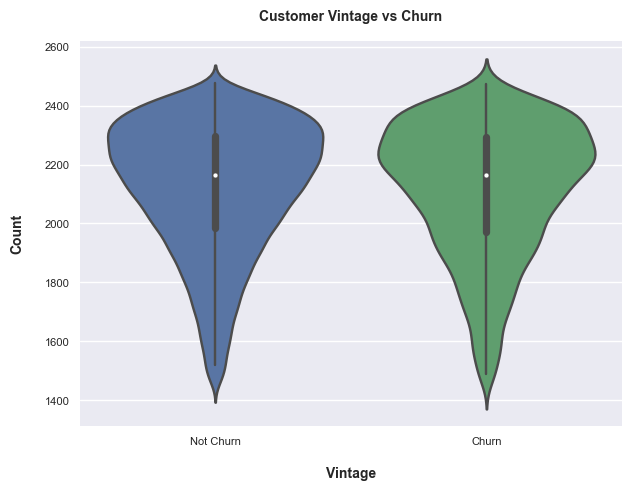

In [11]:
# 1. Apakah kastemer lama (vintage customer) cenderung untuk melakukan churn?

# create matplotlib figure and axes
plt.figure(figsize=(7, 5))

# create seaborn violinplot, set color opacity to 0.5
sns.violinplot(x='churn', y='vintage', data=remove_outliers(data, 'vintage'))

# customize the plot
plt.title('Customer Vintage vs Churn')
plt.xlabel('Vintage')
plt.ylabel('Count')

# set xtickslabel
plt.xticks([0, 1], ['Not Churn', 'Churn'])

# display the plot
plt.show()

C:\Users\hiday\AppData\Local\Temp\ipykernel_19704\1140897533.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_top = remove_outliers(data, col)[data[col] >= top]
C:\Users\hiday\AppData\Local\Temp\ipykernel_19704\1140897533.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_top = remove_outliers(data, col)[data[col] >= top]
C:\Users\hiday\AppData\Local\Temp\ipykernel_19704\1140897533.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_top = remove_outliers(data, col)[data[col] >= top]


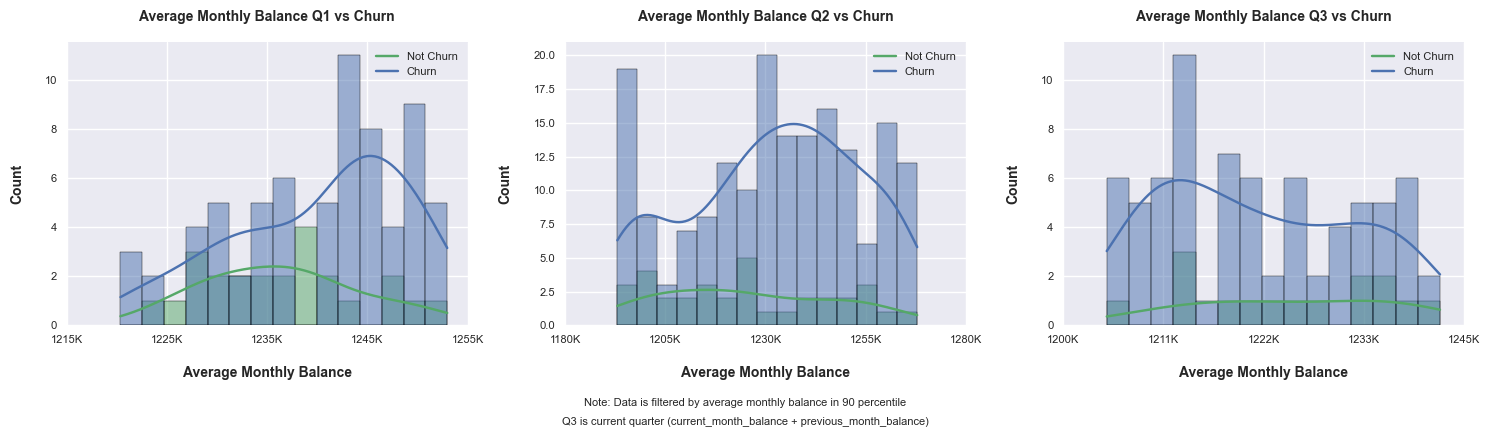

In [12]:
# 2. Apakah kastemer dengan rata-rata saldo tertinggi akan cenderung untuk melakukan churn?

# create matplotlib figure and axes
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for index, col in enumerate(['avg_balance_Q1', 'avg_balance_Q2', 'avg_balance_Q3']):
    # get top 10 percentile of the column
    top = data[col].quantile(0.9)

    # remove outliers for the data and filter the data with top 10 average monthly balance
    data_top = remove_outliers(data, col)[data[col] >= top]

    # create seaborn violinplot, set color opacity to 0.5
    sns.histplot(data=data_top, x=col, hue='churn', bins=15, kde=True, ax=ax[index])
     
    # customize the plot
    ax[index].set_title(f'Average Monthly Balance Q{index + 1} vs Churn')
    ax[index].set_xlabel('Average Monthly Balance')
    ax[index].set_ylabel('Count')
    ax[index].legend(['Not Churn', 'Churn'])

    # set xtickslabel 
    ticks = np.linspace(np.min(ax[index].get_xticks()), np.max(ax[index].get_xticks()), 5)
    ax[index].set_xticks(ticks)
    ax[index].set_xticklabels([f'{int(tick / 1000)}K' for tick in ticks])

# add note to the bottom  the plot, set margin top to 0.5
fig.text(0.5, -0.02, 'Note: Data is filtered by average monthly balance in 90 percentile', ha='center', va='center', fontsize=8)
fig.text(0.5, -0.08, 'Q3 is current quarter (current_month_balance + previous_month_balance)', ha='center', va='bottom', fontsize=8)

# display the plot
plt.tight_layout()
plt.show()

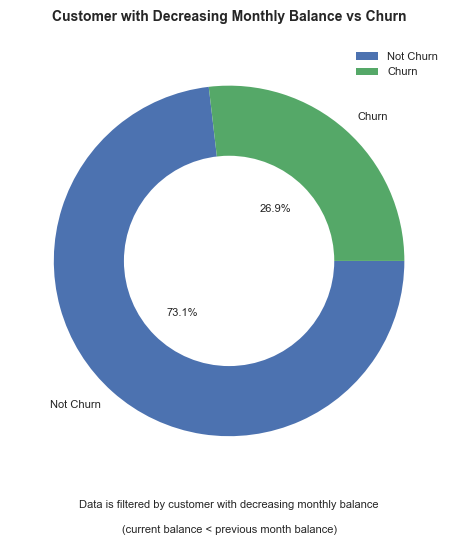

In [13]:
#  Apakah kastemer yang mengalami penurunan saldo bulanan akan cenderung untuk melakukan churn?

# filter data
depr = data[data['current_month_balance'] < data['previous_month_balance']].groupby('churn').count()['customer_id']

# create matplotlib figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# create seaborn donut chart
ax.pie(depr, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', counterclock=False, pctdistance=0.4, textprops={'fontsize': 8})

# crate inner circle to make donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# customize the plot
ax.set_title('Customer with Decreasing Monthly Balance vs Churn')
ax.legend(['Not Churn', 'Churn'])

# add note to the bottom  the plot, set margin top to 0.5
fig.text(0.5, -0.02, 'Data is filtered by customer with decreasing monthly balance', ha='center', va='center', fontsize=8)
fig.text(0.5, -0.08, '(current balance < previous month balance)', ha='center', va='bottom', fontsize=8)

# display the plot
plt.tight_layout()
plt.show()

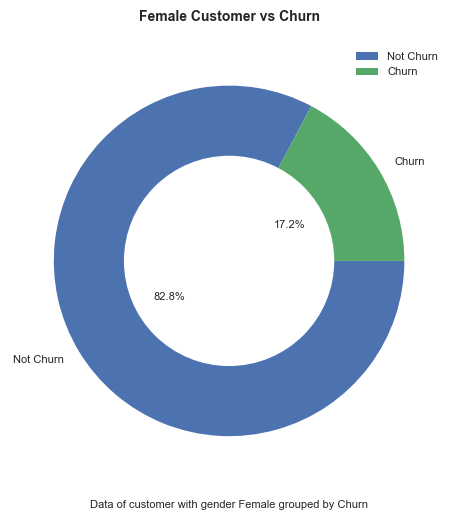

In [14]:
# Apakah kastemer perempuan mempunyai kecenderangan yang rendah untuk melakukan churn?

perempuan = data[data['gender'] == 'Female'].groupby('churn').count()['customer_id']

# create matplotlib figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# create seaborn donut chart
ax.pie(perempuan, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', counterclock=False, pctdistance=0.4, textprops={'fontsize': 8})

# crate inner circle to make donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# customize the plot
ax.set_title('Female Customer vs Churn')
ax.legend(['Not Churn', 'Churn'])

# add note to the bottom  the plot, set margin top to 0.5
fig.text(0.5, -0.02, 'Data of customer with gender Female grouped by Churn', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

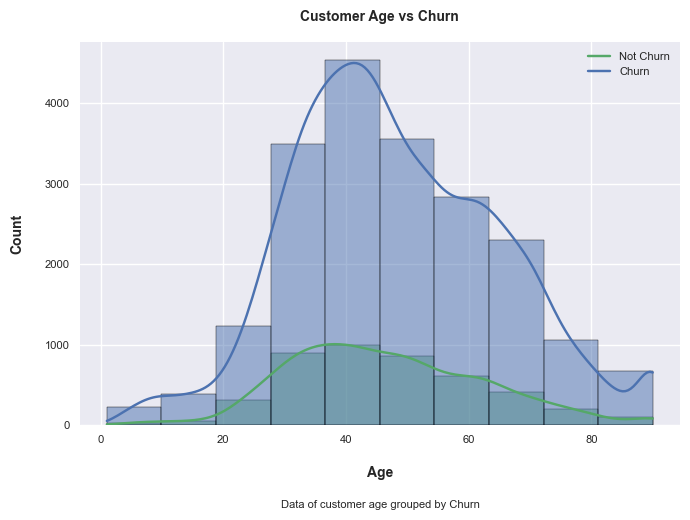

In [15]:
# Apakah kastemer muda akan mempunyai kecenderungan melakukan churn?

# create matplotlib figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# create seaborn using histplot with bins 10
sns.histplot(data=data, x='age', hue='churn', bins=10, kde=True, ax=ax)

# customize the plot
ax.set_title('Customer Age vs Churn')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(['Not Churn', 'Churn'])


# add note to the bottom  the plot
fig.text(0.55, -0.02, 'Data of customer age grouped by Churn', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

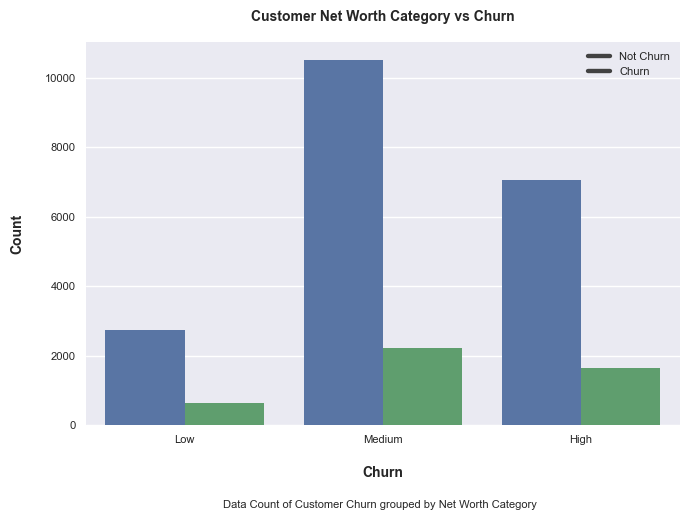

In [43]:
# Apakah kastemer yang dengan penghasilan kecil akan cenderung melakukan churn?

# create matplotlib figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# create grouped barchart using seaborn
income = data.groupby(['customer_nw_category', 'churn']).count()['customer_id'].reset_index()
sns.barplot(data=income, x='customer_nw_category', y='customer_id', hue='churn', ax=ax)

# customize the plot
ax.set_title('Customer Net Worth Category vs Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.legend(['Not Churn', 'Churn'])

# change xtickslabel
ax.set_xticklabels(['Low', 'Medium', 'High'])

# add note to the bottom  the plot
fig.text(0.55, -0.02, 'Data Count of Customer Churn grouped by Net Worth Category', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()